<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

Lấy data từ link về


In [17]:
!wget http://cs.uit.edu.vn/data2.txt
!ls

--2020-06-13 09:21:12--  http://cs.uit.edu.vn/data2.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1203726 (1.1M) [text/plain]
Saving to: ‘data2.txt.1’

data2.txt.1         100%[===================>]   1.15M  5.02MB/s    in 0.2s    

2020-06-13 09:21:12 (5.02 MB/s) - ‘data2.txt.1’ saved [1203726/1203726]

data2.txt  data2.txt.1	sample_data


Đọc dữ liệu bằng pd.read_csv và tách bộ dữ liệu

In [0]:
data=pd.read_csv('data2.txt',header=None)
data.columns=['Complexity','Timing']
#data=data.assign(Square=np.power(data['Complexity'],2),Logarit=np.log2(data['Complexity'],where=(data['Complexity']!=0))*data['Complexity'])
#data=data[['Complexity','Square','Logarit','Timing']]
#x=data[['Complexity','Square','Logarit']]
x=data[['Complexity']]
y=data[['Timing']]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,)

Lựa chọn model và fit bộ dữ liệu X_train.values và y_train.values

In [20]:
model=LinearRegression().fit(X_train.values,y_train.values)
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)
y_fit=model.predict(X_train.values)

Slope:  [[8.4556115e-08]]
Intercept:  [-0.01591377]


Vẽ đồ thị để xem được mô hình có khớp với bộ dữ liệu test hay không

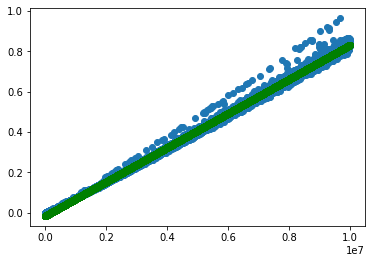

In [21]:
y_predict=model.predict(X_test.values)
plt.scatter(X_test.values,y_test.values)
plt.plot(X_test.values,y_predict,'go')

Ứng dụng dự đoán cho model

In [22]:
def Prediction(x,train=X_train,model=model):
  # squarex=np.power(x,2)
  #log2x=np.log2(x,where=(x!=0))*x
   arr=np.array([[x]])
   pred=model.predict(arr)
   print("Thoi gian du tinh cua thuat toan voi do phuc tap ",x," la: ",pred[0][0])
Prediction(4426776)

Thoi gian du tinh cua thuat toan voi do phuc tap  4426776  la:  0.3583972104583744


*Đánh giá model *

Tính toán R square: tổng tỉ lệ phần trăm về giá trị các data point dự đoán dựa trên model được xây dựng so với các data point thực tế 

In [24]:
r2_score(y_test,y_predict)

0.9975725646439417